# Find Representation Bias with `capsa` 
###  A Python Library for Deep Learning Model Risk Management

-------------------------

#### Section 1: What is Representation Bias? 

Representation bias, also known as sampling bias, is a type of bias that occurs when a dataset does not accurately reflect the characteristics of the population that it is supposed to represent. This can happen for a variety of reasons, such as when a dataset only includes data from a specific group of people or when the data collection process only includes certain types of information.

Representation bias is important to mitigate because it can lead to inaccurate or unfair conclusions being drawn from the data. For example, if a dataset is biased towards a certain demographic group, it may not accurately reflect the experiences or characteristics of other groups, leading to conclusions that only apply to the group that is over-represented in the dataset.

Mitigating representation bias involves carefully designing the data collection process to ensure that it accurately reflects the population being studied, and also carefully analyzing the data to identify any potential biases. This can involve techniques such as stratified sampling, which involves dividing the population into different groups and then sampling from each group to ensure that all groups are represented in the dataset.

------------------------------

#### Section 2: ``capsa`` (a Python Library for Mitigating Uncertainty)

Capsa is a convenient model wrapping tool. It wraps around predefined Keras models, adding the ability to perform risk analysis on the predictions made by those models, and therefore letting developers make more informed decisions about how to use it in their applications.

``capsa`` allows users to select a MetricWrapper that augments model with a corresponding risk-metric:

- **Representation Bias**: Bias of a dataset that exists in a target feature space in the model 
    - HistogramWrapper
- **Aleatoric Uncertainty**: Uncertainty that results from randomness or inherent noise in the data
    - MVEWrapper
- **Epistemic Uncertainty**: Uncertainty in a model's predictions due to model limitations or limited data
    - DropoutWrapper
    - EnsembleWrapper
    - VAEWrapper


-------------------

#### Section 3: How to use ``capsa``

##### Installation and Import

First of all, let's install ``capsa`` to our work environment with ``pip install capsa``.

In [ ]:
!pip install capsa

1. You would start by importing all the necessary tools libraries that you'd be importing in your normal workflow.

In [1]:
import numpy as np
import tensorflow as tf 
import helper # helper.py is a python file in the same directory as this notebook and contains some helper functions.

2. You would have your own training and test dataset ready.

In [2]:
(x_train, y_train), (x_test, y_test) = helper.generate_moon_data_classification()

3. You might want to visualize your own dataset to get a better understanding of your own data. So you plot your training dataset into a graph.

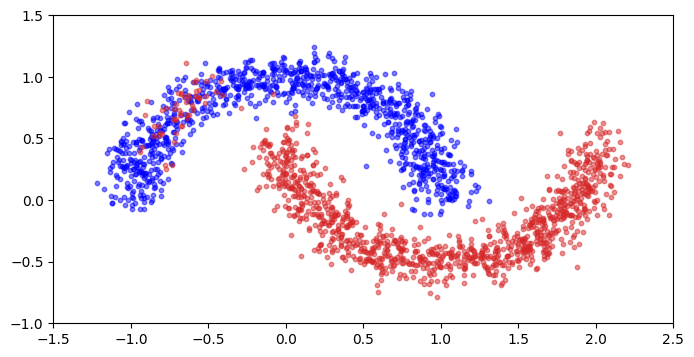

In [3]:
helper.plot_for_moons(x_train, y_train)

4. You import **CAPSA**'s HistogramWrapper() class. This class help wrap your model model to be risk-aware towards representation bias. You only need to pass a predefined model. 

In [4]:
from capsa import HistogramWrapper

5. Just like in your normal workflow, you'd have your own pre-defined model.

In [5]:
user_model = helper.get_model()

6. Now, you would wrap your model with HistogramWrapper. Currently, HistogramWrapper requires you to several parameters. Please check out our [API documentation](https://themisai.io/capsa/api_documentation/HistogramWrapper.html) for more info!

In [10]:
bin_amt = 20
histogram_model = HistogramWrapper(user_model,num_bins=bin_amt,queue_size=20000,target_hidden_layer=False)

In [7]:
histogram_model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
            )

In [8]:
histogram_model.fit(x_train,y_train,epochs = 2)

Epoch 1/2
1313/1313 [==============================] - 6s 2ms/step - histogram_loss: 0.3207 - histogram_binary_accuracy: 0.8941
Epoch 2/2
1313/1313 [==============================] - 3s 2ms/step - histogram_loss: 0.0747 - histogram_binary_accuracy: 0.9734


For the sake of our tutorial, we will generate points in an area of interest in input space, and pass them to our wrapped model to look at their representation. We can observe that the areas that include our samples have higher representation compared to other places in the input space.

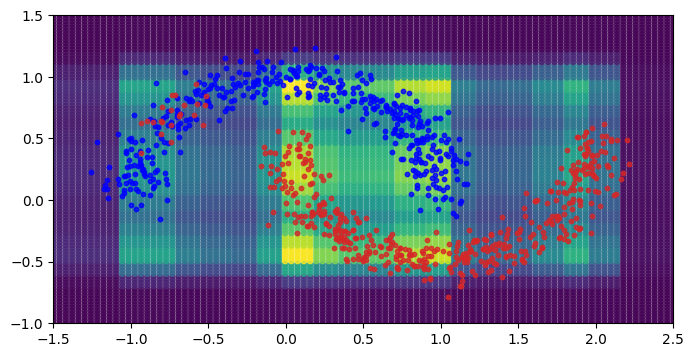

In [9]:
mesh_grid = helper.get_grid()

bias_values = histogram_model(mesh_grid)[1]
helper.histogram_plot_w_mesh(x_test,y_test,bias_values,mesh_grid)


In [ ]:
histogram_model(mesh_grid)[0]

In [ ]:
bias = histogram_model(mesh_grid)[1]